<a href="https://colab.research.google.com/github/Raybarreto/Analise_EnergiaSolar_BR/blob/main/Energia_Solar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação

In [1]:
import pandas as pd
df = pd.read_csv('/content/dados_instalacoes_solares.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/dados_instalacoes_solares.csv'

In [ ]:
df.info()

# Verificando Inconsistências nos Dados

**1. Verificar valores ausentes**

In [ ]:
print("Valores Ausentes por Coluna:")
print(df.isnull().sum())

Valores Ausentes por Coluna:
ID Cliente                 0
Nome do Cliente            0
Data da Instalação         0
Tipo de Instalação         0
Endereço (Rua)             0
Bairro                     0
Cidade                     0
Estado                     0
CEP                        0
Valor do Serviço (R$)      0
Tipo de Pagamento          0
Nº Parcelas                0
Instituição Financeira    32
Origem do Cliente          0
Avaliação (1-5)            0
Comentário do Cliente     11
Sistema (kWp)              0
Nº de Placas               0
Indicação de Quem?        41
Vendedor Responsável       0
dtype: int64


**2. Verificar linhas duplicadas**


In [ ]:
print(f"Número de Linhas Duplicadas: {df.duplicated().sum()}\n")

Número de Linhas Duplicadas: 0



**3. Verificar valores únicos para colunas categóricas para identificar inconsistências**

In [ ]:
print("Valores Únicos para Colunas Categóricas (Amostra):")
for col in ['Tipo de Instalação', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Instituição Financeira', 'Origem do Cliente', 'Vendedor Responsável']:
    if col in df.columns:
        print(f"- {col}: {df[col].nunique()} valores únicos")
        if df[col].nunique() < 50:
            print(f"  {df[col].unique()}")
        print("-" * 30)

Valores Únicos para Colunas Categóricas (Amostra):
- Tipo de Instalação: 4 valores únicos
  ['Residencial' 'Comercial' 'Rural' 'Industrial']
------------------------------
- Cidade: 44 valores únicos
  ['Borges' 'Cavalcanti' 'Teixeira Verde' 'Siqueira' 'Garcia'
 'Silveira do Galho' 'Viana' 'da Mota' 'Moraes do Galho'
 'Macedo das Flores' 'Pires' 'das Neves de Goiás' 'da Costa'
 'Nunes de Mendonça' 'Vasconcelos' 'Pereira do Sul' 'Brito' 'Almeida'
 'Gomes' 'Araújo' 'Abreu' 'Moura' 'Vieira' 'Duarte do Norte'
 'Pires do Galho' 'Sá Verde' 'Marques' 'Campos' 'Costa das Flores'
 'Viana de Santos' 'Ramos Alegre' 'Barbosa da Prata' 'Nogueira' 'Azevedo'
 'Barros de Araújo' 'Cassiano de Rodrigues' 'da Rocha' 'Lopes' 'Monteiro'
 'Guerra da Mata' 'Barros da Prata' 'Alves da Mata' 'Farias'
 'Moraes da Prata']
------------------------------
- Estado: 23 valores únicos
  ['AP' 'PE' 'SP' 'PA' 'PI' 'CE' 'AC' 'MA' 'RO' 'RS' 'PR' 'GO' 'AL' 'RJ'
 'ES' 'MT' 'DF' 'TO' 'MS' 'BA' 'AM' 'RN' 'PB']
--------------

# Tratando as Inconsistências

1. **Lidar com valores ausentes**

Para `'Comentário do Cliente'` e `'Indicação de Quem?'`, faz sentido preencher` NaN` com 'Não Informado' ou 'N/A'

In [ ]:
df.loc[:, 'Comentário do Cliente'] = df['Comentário do Cliente'].fillna('Não Informado')
df.loc[:, 'Indicação de Quem?'] = df['Indicação de Quem?'].fillna('N/A')

<ipython-input-18-08b1d8bc2b17>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comentário do Cliente'].fillna('Não Informado', inplace=True)
<ipython-input-18-08b1d8bc2b17>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

**Lidar com valores ausentes**
* Para 'C`omentário do Cliente'` e `'Indicação de Quem?`', **faz sentido** preencher `NaN` com 'Não Informado' ou `'N/A'`

* Para `'Instituição Financeira'`, se `'Tipo de Pagamento'` **não for** `'Financiamento`', preencher com `'N/A'`. Primeiro, garantir que `'Tipo de Pagamento'` seja consistente (ex: padronizar maiúsculas/minúsculas)

* Para `'Instituição Financeira'` que ainda são `NaN` onde `'Tipo de Pagamento'` É `'Financiamento'`, são valores realmente ausentes. Por enquanto, preencheremos com **'Não Informado'**, mas em um cenário real, isso exigiria investigação.

* Para `'Nº de Parcelas'`, se `'Tipo de Pagamento'` for `'À Vista'` ou `'Pix'`, deve ser 1, caso contrário preencher` NaN` com 0

In [ ]:
df['Comentário do Cliente'].fillna('Não Informado', inplace=True)
df['Indicação de Quem?'].fillna('N/A', inplace=True)

df['Tipo de Pagamento'] = df['Tipo de Pagamento'].str.title() # Capitalizar a primeira letra de cada palavra
df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'] = df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'].fillna('N/A')

df['Instituição Financeira'].fillna('Não Informado', inplace=True)

df.loc[(df['Tipo de Pagamento'] == 'À Vista') | (df['Tipo de Pagamento'] == 'Pix'), 'Nº de Parcelas'] = 1
df['Nº de Parcelas'].fillna(0, inplace=True) # Assumir 0 para outros tipos não parcelados ou valores verdadeiramente ausentes

# Converter 'Data da Instalação' para objetos datetime
df['Data da Instalação'] = pd.to_datetime(df['Data da Instalação'], errors='coerce') # 'coerce' transforma datas inválidas em NaT (Not a Time)
print("Valores ausentes após tratamento inicial:")
print(df.isnull().sum())
print("\n")

# Remover linhas onde 'Data da Instalação' é NaT (se houver após a coerção)
df.dropna(subset=['Data da Instalação'], inplace=True)

# Remover linhas duplicadas
df.drop_duplicates(inplace=True)
print(f"Número de Linhas Duplicadas após remoção: {df.duplicated().sum()}\n")

# Padronizar colunas categóricas (ex: remover espaços, padronizar maiúsculas/minúsculas)
for col in ['Tipo de Instalação', 'Endereço', 'Bairro', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Instituição Financeira', 'Origem do Cliente', 'Vendedor Responsável']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title()

# Corrigir potenciais inconsistências em 'Avaliação (1-5)'
df['Avaliação (1-5)'] = pd.to_numeric(df['Avaliação (1-5)'], errors='coerce')
df['Avaliação (1-5)'] = df['Avaliação (1-5)'].clip(lower=1, upper=5) # Limitar valores entre 1 e 5
df['Avaliação (1-5)'].fillna(df['Avaliação (1-5)'].median(), inplace=True) # Preencher NaNs criados pela coerção com a mediana

# Garantir que as colunas numéricas sejam do tipo apropriado e lidar com possíveis entradas não numéricas
numerical_cols = ['Valor do Serviço (R$)', 'Nº Parcelas', 'Sistema (kWp)', 'Nº de Placas']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True) # Preencher NaNs com a mediana se valores não numéricos foram coercidos

Valores ausentes após tratamento inicial:
ID Cliente                0
Nome do Cliente           0
Data da Instalação        0
Tipo de Instalação        0
Endereço (Rua)            0
Bairro                    0
Cidade                    0
Estado                    0
CEP                       0
Valor do Serviço (R$)     0
Tipo de Pagamento         0
Nº Parcelas               0
Instituição Financeira    0
Origem do Cliente         0
Avaliação (1-5)           0
Comentário do Cliente     0
Sistema (kWp)             0
Nº de Placas              0
Indicação de Quem?        0
Vendedor Responsável      0
Nº de Parcelas            0
dtype: int64


Número de Linhas Duplicadas após remoção: 0



<ipython-input-20-2a7369279aef>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comentário do Cliente'].fillna('Não Informado', inplace=True)
<ipython-input-20-2a7369279aef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [ ]:
print("Informações do DataFrame após Tratamento de Inconsistências:")
df.info()
print("\n")
print("Valores Ausentes após Tratamento de Inconsistências:")
print(df.isnull().sum())
print("\n")
print("Primeiras Linhas do DataFrame Limpo:")
df.head()

Informações do DataFrame após Tratamento de Inconsistências:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Cliente              50 non-null     object        
 1   Nome do Cliente         50 non-null     object        
 2   Data da Instalação      50 non-null     datetime64[ns]
 3   Tipo de Instalação      50 non-null     object        
 4   Endereço (Rua)          50 non-null     object        
 5   Bairro                  50 non-null     object        
 6   Cidade                  50 non-null     object        
 7   Estado                  50 non-null     object        
 8   CEP                     50 non-null     object        
 9   Valor do Serviço (R$)   50 non-null     float64       
 10  Tipo de Pagamento       50 non-null     object        
 11  Nº Parcelas             50 non-null     int64      

,ID Cliente,Nome do Cliente,Data da Instalação,Tipo de Instalação,Endereço (Rua),Bairro,Cidade,Estado,CEP,Valor do Serviço (R$),...,Nº Parcelas,Instituição Financeira,Origem do Cliente,Avaliação (1-5),Comentário do Cliente,Sistema (kWp),Nº de Placas,Indicação de Quem?,Vendedor Responsável,Nº de Parcelas
0,CLI001,Cauã Garcia,2024-09-04,Residencial,"Loteamento Aylla da Rosa, 292",Marilandia,Borges,Ap,68579-917,37145.32,...,0,N/A,Outro,3,Provident sapiente atque.,3.6,11,N/A,Ana Clara,0.0
1,CLI002,Sra. Bella Costa,2025-05-22,Comercial,"Esplanada de Silveira, 1626",Jatobá,Cavalcanti,Pe,81930-160,6717.97,...,0,N/A,Indicação,2,Não Informado,6.7,18,Miguel Aragão,Diana Santos,0.0
2,CLI003,Sr. Daniel Guerra,2024-09-30,Rural,"Residencial Heloísa Montenegro, 1755",Vila Ouro Minas,Teixeira Verde,Sp,99598-841,44610.47,...,0,N/A,Parceria,2,Não Informado,9.5,30,N/A,Bruno Silva,1.0
3,CLI004,Cecilia Barbosa,2023-12-22,Residencial,"Parque Garcia, 405",São Pedro,Siqueira,Pa,72816693,44079.89,...,0,N/A,Feira/Evento,4,Beatae impedit recusandae velit occaecati sequi.,4.9,17,N/A,Ana Clara,0.0
4,CLI005,Elisa da Mota,2024-07-01,Comercial,"Praça Mendonça, 1936",Palmeiras,Garcia,Ap,28250-077,29114.56,...,0,N/A,Feira/Evento,3,Ipsam quod at ab aut vitae.,15.9,39,N/A,Diana Santos,1.0


# Carga e Análise dos Dados

**1. Análise Descritiva**

In [ ]:
print("Estatísticas Descritivas das Principais Colunas Numéricas:")
df[['Valor do Serviço (R$)', 'Avaliação (1-5)', 'Sistema (kWp)', 'Nº de Placas']].describe()

Estatísticas Descritivas das Principais Colunas Numéricas:


,Valor do Serviço (R$),Avaliação (1-5),Sistema (kWp),Nº de Placas
count,50.000000,50.000000,50.000000,50.000000
mean,44389.759000,2.940000,10.104000,30.260000
std,21592.837082,1.346348,5.527924,17.161668
min,5604.890000,1.000000,2.100000,6.000000
25%,27568.450000,2.000000,5.275000,16.250000
50%,45014.505000,3.000000,8.400000,25.500000
75%,62185.792500,4.000000,15.725000,44.000000
max,79523.170000,5.000000,19.900000,63.000000


2. **Regiões com maior potencial de novos clientes**

In [ ]:
print("Top 5 Cidades por Número de Instalações:")
print(df['Cidade'].value_counts().head(5))

Top 5 Cidades por Número de Instalações:
Cidade
Campos        3
Cavalcanti    2
Araújo        2
Garcia        2
Almeida       2
Name: count, dtype: int64


In [ ]:
print("Top 5 Estados por Número de Instalações:")
print(df['Estado'].value_counts().head(5))

Top 5 Estados por Número de Instalações:
Estado
Ro    7
Pe    5
Ap    4
Rj    4
Sp    3
Name: count, dtype: int64


3. **Combinar número de instalações com a satisfação média**

In [ ]:
city_analysis = df.groupby('Cidade').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avaliação (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 5 Cidades por Número de Instalações e Avaliação Média:")
print(city_analysis.head(5))
print("\n")

state_analysis = df.groupby('Estado').agg(
    Numero_instalacao=('ID Cliente', 'count'),
    Classificacao_media=('Avaliação (1-5)', 'mean')
).sort_values(by='Numero_instalacao', ascending=False)
print("Top 5 Estados por Número de Instalações e Avaliação Média:")
print(state_analysis.head(5))

Top 5 Cidades por Número de Instalações e Avaliação Média:
            Numero_instalacao  Classificacao_media
Cidade                                            
Campos                      3             3.666667
Almeida                     2             1.500000
Araújo                      2             2.000000
Cavalcanti                  2             2.500000
Garcia                      2             3.000000


Top 5 Estados por Número de Instalações e Avaliação Média:
        Numero_instalacao  Classificacao_media
Estado                                        
Ro                      7             2.714286
Pe                      5             3.400000
Ap                      4             3.000000
Rj                      4             2.500000
Sp                      3             2.000000


4. **Perfis de clientes mais satisfeitos**

Analisar 'Tipo de Instalação' e 'Origem do Cliente' em relação à 'Avaliação (1-5)'.

In [ ]:
print("Avaliação Média por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Avaliação (1-5)'].mean().sort_values(ascending=False))
print("\n")

print("Avaliação Média por Origem do Cliente:")
print(df.groupby('Origem do Cliente')['Avaliação (1-5)'].mean().sort_values(ascending=False))
print("\n")

Avaliação Média por Tipo de Instalação:
Tipo de Instalação
Industrial     3.100000
Rural          3.058824
Comercial      3.000000
Residencial    2.642857
Name: Avaliação (1-5), dtype: float64


Avaliação Média por Origem do Cliente:
Origem do Cliente
Google             4.000000
Feira/Evento       3.285714
Outro              3.125000
Mídias Sociais     3.000000
Indicação          2.888889
Site Da Empresa    2.571429
Parceria           2.285714
Panfleto           2.000000
Name: Avaliação (1-5), dtype: float64




5. **Tipos de instalação mais lucrativos.**

In [ ]:
# Analisar 'Tipo de Instalação' em relação a 'Valor do Serviço' e 'Sistema (kWp)'.
print("Valor Médio do Serviço por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Valor do Serviço (R$)'].mean().sort_values(ascending=False))
print("\n")

print("Sistema (kWp) Médio por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Sistema (kWp)'].mean().sort_values(ascending=False))
print("\n")

# Considerar também o valor médio por kWp
df['Valor_por_kWp'] = df['Valor do Serviço (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0 # Evitar divisão por zero
print("Valor Médio por kWp por Tipo de Instalação:")
print(df.groupby('Tipo de Instalação')['Valor_por_kWp'].mean().sort_values(ascending=False))
print("\n")

Valor Médio do Serviço por Tipo de Instalação:
Tipo de Instalação
Rural          51218.938824
Comercial      47368.468889
Industrial     42214.780000
Residencial    35735.855000
Name: Valor do Serviço (R$), dtype: float64


Sistema (kWp) Médio por Tipo de Instalação:
Tipo de Instalação
Industrial     10.310000
Comercial      10.177778
Rural          10.035294
Residencial     9.992857
Name: Sistema (kWp), dtype: float64


Valor Médio por kWp por Tipo de Instalação:
Tipo de Instalação
Comercial      7699.391496
Rural          7626.679444
Industrial     6354.401816
Residencial    5024.044959
Name: Valor_por_kWp, dtype: float64




6. **Canais de aquisição mais eficazes.**

In [ ]:
# A eficácia pode ser medida pelo número de clientes adquiridos e pela avaliação média.
print("Número de Clientes e Avaliação Média por Origem do Cliente:")
análise_canal_aquisição = df.groupby('Origem do Cliente').agg(
   Numero_Clientes=('ID Cliente', 'count'),
   Classificacao_media=('Avaliação (1-5)', 'mean'),
   Receita_total=('Valor do Serviço (R$)', 'sum')
).sort_values(by='Numero_Clientes', ascending=False)
print(análise_canal_aquisição)
print("\n")

Número de Clientes e Avaliação Média por Origem do Cliente:
                   Numero_Clientes  Classificacao_media  Receita_total
Origem do Cliente                                                     
Indicação                        9             2.888889      378046.13
Outro                            8             3.125000      223573.33
Parceria                         7             2.285714      431371.26
Feira/Evento                     7             3.285714      255856.51
Site Da Empresa                  7             2.571429      276180.15
Google                           5             4.000000      248219.28
Mídias Sociais                   5             3.000000      268455.31
Panfleto                         2             2.000000      137785.98




7. **Barreiras que dificultam novas vendas.**

In [ ]:
# Isso requer análise qualitativa de 'Comentário do Cliente' e possivelmente de avaliações baixas.
# Para uma abordagem quantitativa, podemos olhar para características de instalações com avaliações baixas.
print("Instalações com Avaliações Baixas (1 ou 2 estrelas) - Amostra de Comentários:")
Comentários_baixa_Classificação = df[df['Avaliação (1-5)'] <= 2]['Comentário do Cliente'].value_counts().head(10)
if not Comentários_baixa_Classificação.empty:
    print(Comentários_baixa_Classificação)
else:
    print("Não há comentários de avaliações baixas para exibir.")
print("\n")

Instalações com Avaliações Baixas (1 ou 2 estrelas) - Amostra de Comentários:
Comentário do Cliente
Não Informado                                                 3
Nostrum unde laboriosam repudiandae aut nulla labore.         1
Autem incidunt omnis tempora libero vero officiis.            1
Odio aliquid maiores distinctio.                              1
Qui nemo quam asperiores.                                     1
Dolores velit at reiciendis cumque unde cumque.               1
Cupiditate debitis est labore vel.                            1
Ad aliquid officia dolor possimus.                            1
Enim amet veniam neque possimus nemo maiores quis.            1
Corporis exercitationem iusto ratione recusandae incidunt.    1
Name: count, dtype: int64




In [ ]:
# Podemos também analisar o 'Tipo de Pagamento' para serviços com avaliações baixas.
print("Tipo de Pagamento para Instalações com Avaliações Baixas (<=2):")
print(df[df['Avaliação (1-5)'] <= 2]['Tipo de Pagamento'].value_counts())
print("\n")

Tipo de Pagamento para Instalações com Avaliações Baixas (<=2):
Tipo de Pagamento
Boleto                    6
Financiamento Bancário    6
À Vista                   4
Cartão De Crédito         3
Name: count, dtype: int64




#Insights

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tratamento das Inconsistências (ajustado para evitar FutureWarnings) ---

# Substitua .fillna(..., inplace=True) por df[col] = df[col].fillna(...)
df['Comentário do Cliente'] = df['Comentário do Cliente'].fillna('Não Informado')
df['Indicação de Quem?'] = df['Indicação de Quem?'].fillna('N/A')

# Padronizar 'Tipo de Pagamento' antes de usá-lo em .loc
df['Tipo de Pagamento'] = df['Tipo de Pagamento'].str.title()

# Lidar com Instituição Financeira
# Primeiro, preencha onde o Tipo de Pagamento NÃO é Financiamento
df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'] = \
    df.loc[df['Tipo de Pagamento'] != 'Financiamento', 'Instituição Financeira'].fillna('N/A')
# Em seguida, preencha os restantes (onde o Tipo de Pagamento É Financiamento, mas o valor é NaN)
df['Instituição Financeira'] = df['Instituição Financeira'].fillna('Não Informado')


# Lidar com Nº de Parcelas
df.loc[(df['Tipo de Pagamento'] == 'À Vista') | (df['Tipo de Pagamento'] == 'Pix'), 'Nº de Parcelas'] = 1
df['Nº de Parcelas'] = df['Nº de Parcelas'].fillna(0) # Substitua inplace=True

# Converter 'Data da Instalação' para objetos datetime
df['Data da Instalação'] = pd.to_datetime(df['Data da Instalação'], errors='coerce')

# Remover linhas onde 'Data da Instalação' é NaT
df = df.dropna(subset=['Data da Instalação']) # Atribua de volta para o df

# Remover linhas duplicadas
df = df.drop_duplicates() # Atribua de volta para o df

# Padronizar colunas categóricas
for col in ['Tipo de Instalação', 'Endereço', 'Bairro', 'Cidade', 'Estado', 'Tipo de Pagamento', 'Instituição Financeira', 'Origem do Cliente', 'Vendedor Responsável']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title()

# Corrigir potenciais inconsistências em 'Avaliação (1-5)'
df['Avaliação (1-5)'] = pd.to_numeric(df['Avaliação (1-5)'], errors='coerce')
df['Avaliação (1-5)'] = df['Avaliação (1-5)'].clip(lower=1, upper=5)
df['Avaliação (1-5)'] = df['Avaliação (1-5)'].fillna(df['Avaliação (1-5)'].median()) # Substitua inplace=True

# Garantir que as colunas numéricas sejam do tipo apropriado e lidar com possíveis entradas não numéricas
numerical_cols = ['Valor do Serviço (R$)', 'Nº Parcelas', 'Sistema (kWp)', 'Nº de Placas']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median()) # Substitua inplace=True

# Recalcular Valor_por_kWp após todos os tratamentos
df['Valor_por_kWp'] = df['Valor do Serviço (R$)'] / df['Sistema (kWp)']
df.loc[df['Sistema (kWp)'] == 0, 'Valor_por_kWp'] = 0
# --- Fim do tratamento ajustado ---

1. Gráfico de Barras: Top 10 Cidades por Número de Instalações

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Tamanho padrão da figura

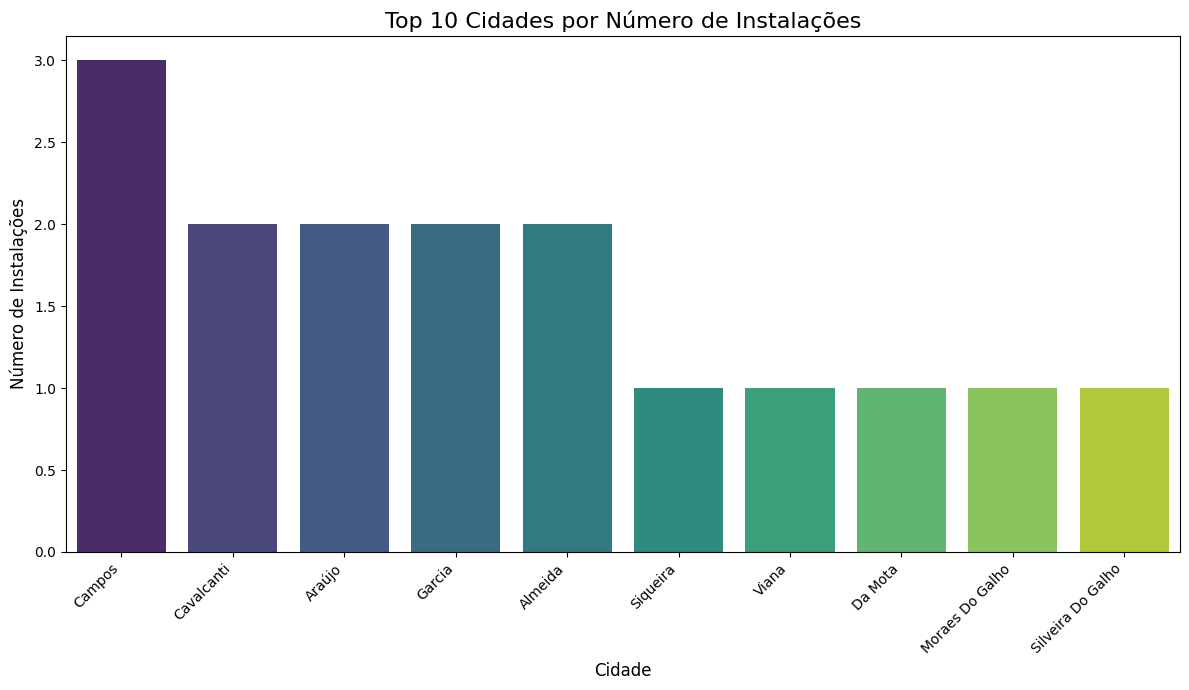

In [ ]:
plt.figure(figsize=(12, 7))
top_cidades = df['Cidade'].value_counts().head(10).reset_index() # Transforma em DataFrame para usar 'hue'
top_cidades.columns = ['Cidade', 'Número de Instalações'] # Renomeia colunas para clareza
sns.barplot(x='Cidade', y='Número de Instalações', hue='Cidade', data=top_cidades, palette='viridis', legend=False) # Ajuste aqui!
plt.title('Top 10 Cidades por Número de Instalações', fontsize=16)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

2. Gráfico de Barras: Avaliação Média por Tipo de Instalação

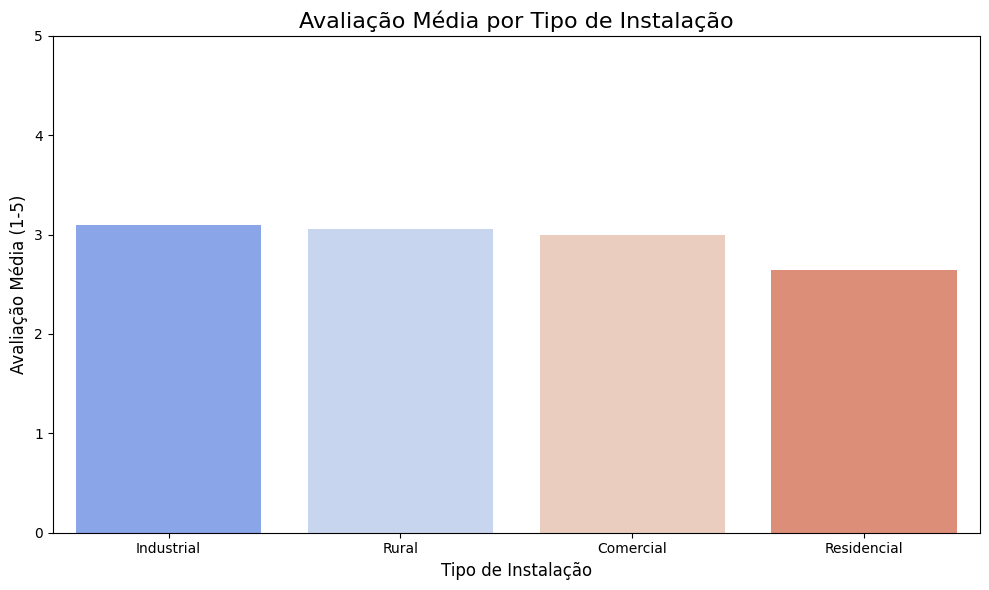

In [ ]:
plt.figure(figsize=(10, 6))
avg_rating_tipo = df.groupby('Tipo de Instalação')['Avaliação (1-5)'].mean().sort_values(ascending=False).reset_index() # Ajuste aqui!
sns.barplot(x='Tipo de Instalação', y='Avaliação (1-5)', hue='Tipo de Instalação', data=avg_rating_tipo, palette='coolwarm', legend=False) # Ajuste aqui!
plt.title('Avaliação Média por Tipo de Instalação', fontsize=16)
plt.xlabel('Tipo de Instalação', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

3. Gráfico de Barras: Avaliação Média por Origem do Cliente

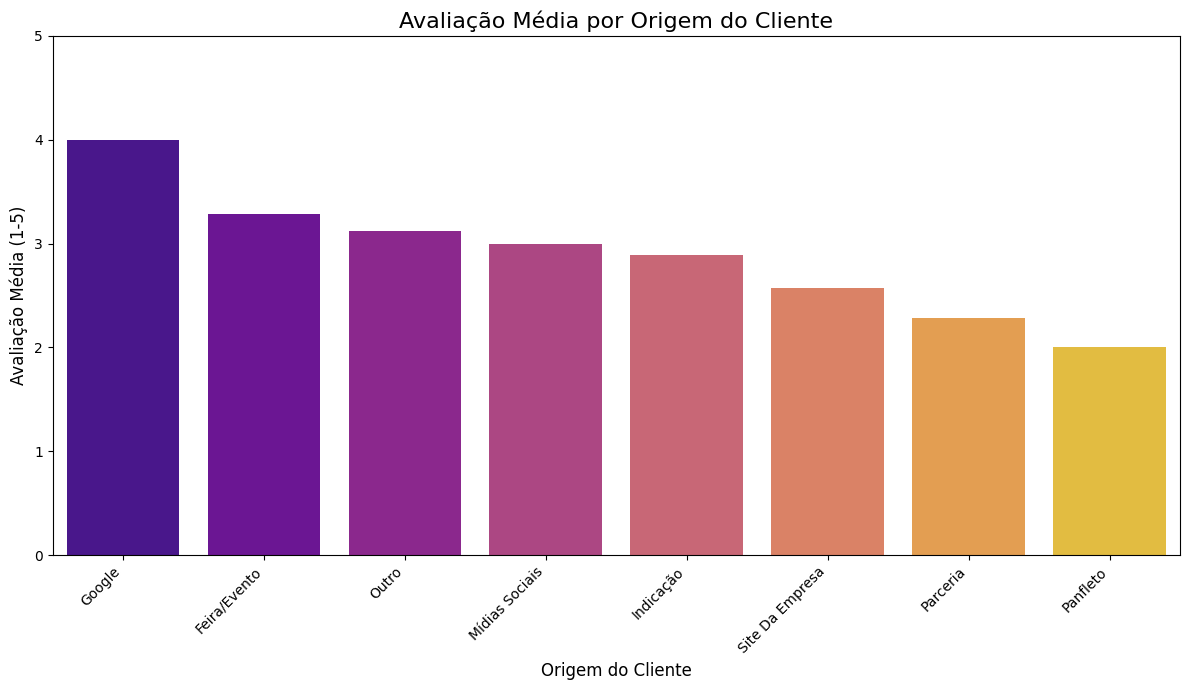

In [ ]:
plt.figure(figsize=(12, 7))
avg_rating_origem = df.groupby('Origem do Cliente')['Avaliação (1-5)'].mean().sort_values(ascending=False).reset_index() # Ajuste aqui!
sns.barplot(x='Origem do Cliente', y='Avaliação (1-5)', hue='Origem do Cliente', data=avg_rating_origem, palette='plasma', legend=False) # Ajuste aqui!
plt.title('Avaliação Média por Origem do Cliente', fontsize=16)
plt.xlabel('Origem do Cliente', fontsize=12)
plt.ylabel('Avaliação Média (1-5)', fontsize=12)
plt.ylim(0, 5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Gráfico de Barras: Valor Médio do Serviço por Tipo de Instalação

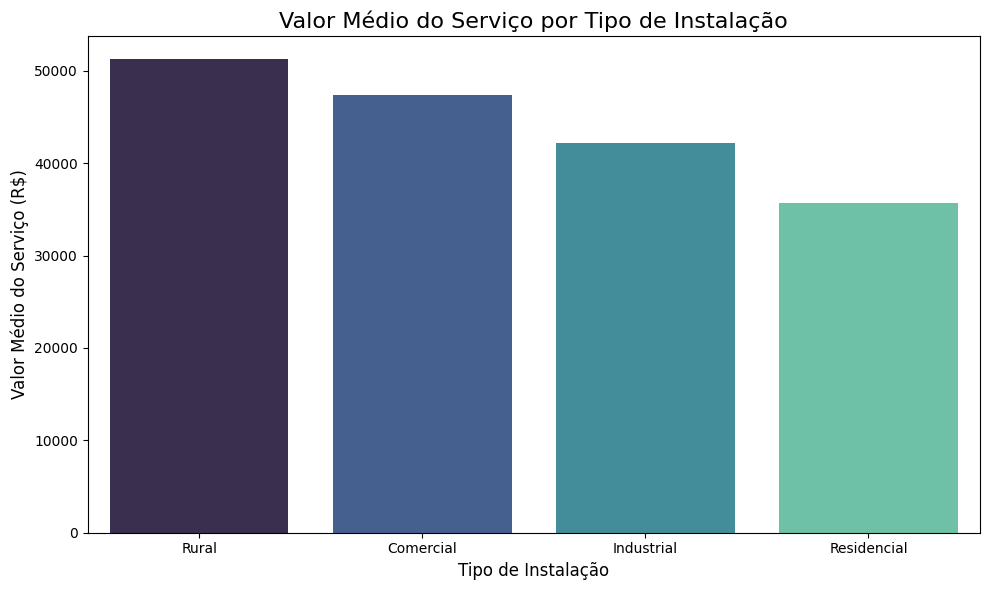

In [ ]:
plt.figure(figsize=(10, 6))
avg_valor_tipo = df.groupby('Tipo de Instalação')['Valor do Serviço (R$)'].mean().sort_values(ascending=False).reset_index() # Ajuste aqui!
sns.barplot(x='Tipo de Instalação', y='Valor do Serviço (R$)', hue='Tipo de Instalação', data=avg_valor_tipo, palette='mako', legend=False) # Ajuste aqui!
plt.title('Valor Médio do Serviço por Tipo de Instalação', fontsize=16)
plt.xlabel('Tipo de Instalação', fontsize=12)
plt.ylabel('Valor Médio do Serviço (R$)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

5. Gráfico de Barras: Número de Clientes por Origem do Cliente

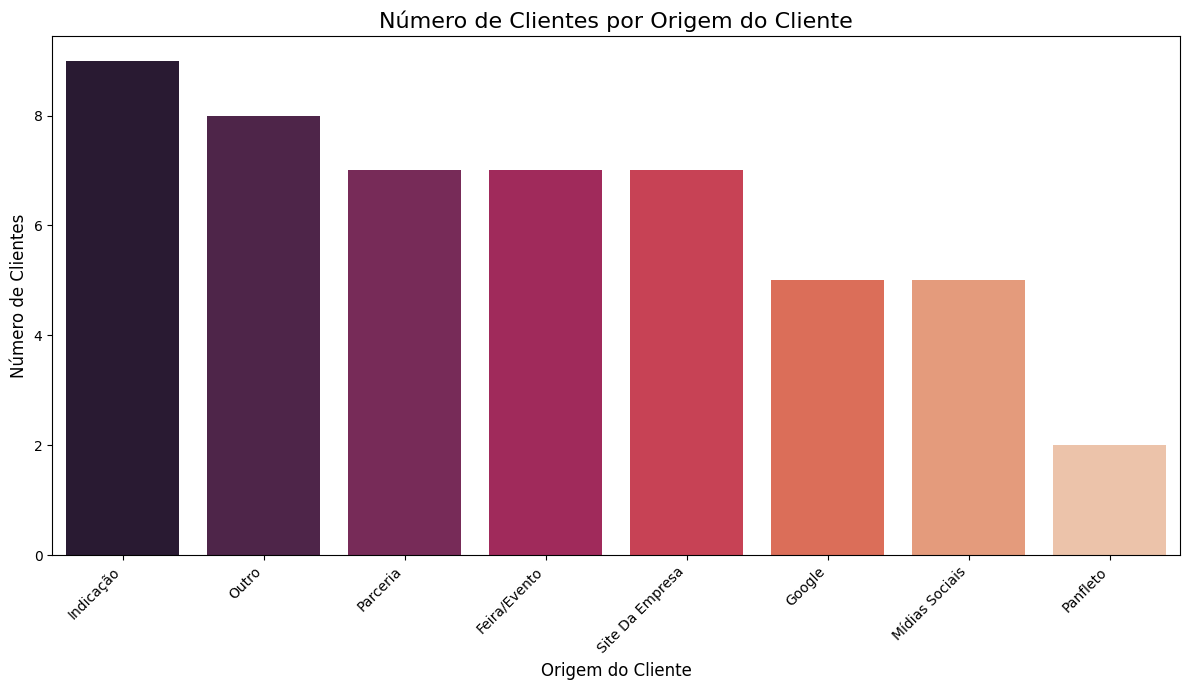

In [ ]:
plt.figure(figsize=(12, 7))
clientes_por_origem = df['Origem do Cliente'].value_counts().reset_index() # Ajuste aqui!
clientes_por_origem.columns = ['Origem do Cliente', 'Número de Clientes'] # Renomeia colunas para clareza
sns.barplot(x='Origem do Cliente', y='Número de Clientes', hue='Origem do Cliente', data=clientes_por_origem, palette='rocket', legend=False) # Ajuste aqui!
plt.title('Número de Clientes por Origem do Cliente', fontsize=16)
plt.xlabel('Origem do Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Histograma: Distribuição das Avaliações dos Clientes

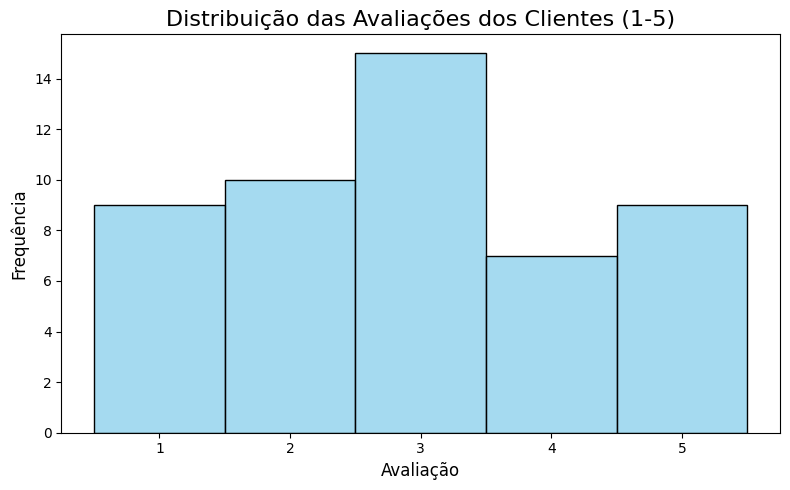

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Avaliação (1-5)'], bins=5, kde=False, discrete=True, color='skyblue')
plt.title('Distribuição das Avaliações dos Clientes (1-5)', fontsize=16)
plt.xlabel('Avaliação', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks([1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

7. Gráfico de Linha: Instalações ao longo do tempo (Mensal)

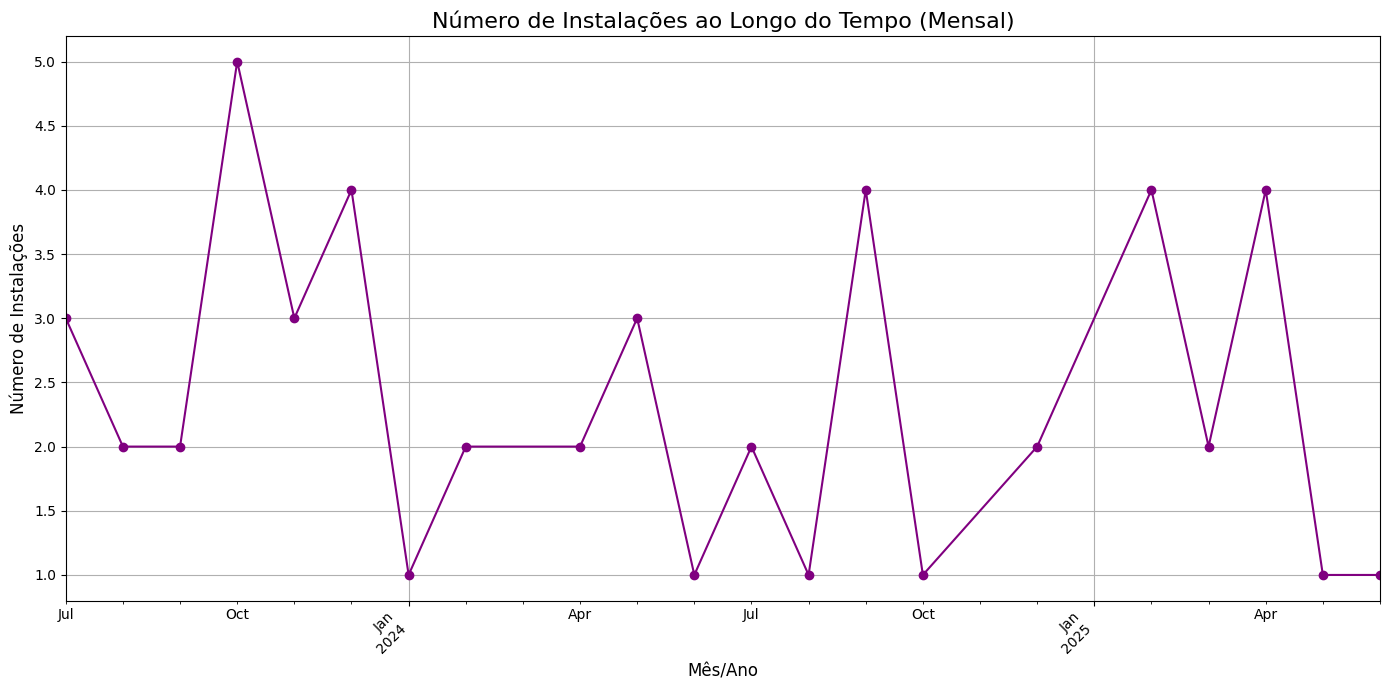

In [ ]:
df['AnoMes'] = df['Data da Instalação'].dt.to_period('M')
instalacoes_mensais = df.groupby('AnoMes').size().sort_index()

plt.figure(figsize=(14, 7))
instalacoes_mensais.plot(kind='line', marker='o', color='purple')
plt.title('Número de Instalações ao Longo do Tempo (Mensal)', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()